# Femicides
##### Data analysis and Visualization by iMEdD Lab/ Thanasis Troboukis
##### Project leader: MIIR

In [1]:
# Import libraries
import pandas as pd
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
import itertools
from functools import reduce

In [2]:
# set options for printing of dataframes
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1500)

In [3]:
# function that cleans rows in the google spreadsheet cells.
def clean(item):
    '''
    function that cleans rows in the google spreadsheet cells.
    applied with lambda function
    '''
    if isinstance(item,str):
        item=item.replace(':','').replace(',','').replace('?','')
        item = item.replace('Germany (until 1990 former territory of the FRG)','Germany').replace('Czech Republic','Czechia')
    try:
        if item.startswith('N/A'):
            item = np.nan
    except:
        pass
    return item

#function to read csv's
def read(paths):
    '''
    function to read csv's (if it's a list of paths, it returns a list of dataframes)
    it also cleans the data from strings and replaces Germany's country name.
    '''
    if type(paths)==list:
        list_dfs = []
        for path in paths:
            df = pd.read_csv(path)
            df = df.applymap(lambda x: clean(x))
            #convert 
            df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
            list_dfs.append(df)
        return list_dfs
    else:
        df = pd.read_csv(paths)
        # clean strings from dataset
        df = df.applymap(lambda x: clean(x))
        # convert strings to numbers
        df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
        return df

# Load datasets
URL names reflect the tabs in the [google spreasheet](https://docs.google.com/spreadsheets/d/1VG3laHmIt-WbKLfVmC8FJpm_m6drp1RXuJFScCK61TQ/edit?usp=sharing).

### 1 Save urls & Columns to be renamed*

In [4]:
#url dataset 1.1
one_1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1746378177&single=true&output=csv'

In [5]:
#url dataset 1.2 - EIGE indicators
one_2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=822247758&single=true&output=csv'

In [6]:
#columns of 1.2 to be renamed to be renamed
cols = {"YEAR": "Year", "indicator 1 - Annual number of women (aged 18 and over) victims of intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) ":"vic_intimate_violence", "indicator 2 - Annual number of REPORTED ofences related to intimate partner violence against women committed by men (aged 18 and over)\nIPV reported ofences (f)":"reported_offences_int_violence", 'indicator 3 - 3 - Annual number of men (aged 18 and over) perpetrators of intimate partner violence against women (and percentage of male population that are perpetrators)\nIPV perpetrators (m)':'men_perpetrators_int_violence', 'indicator 4 - Annual number of women (aged 18 and over) victims of physical intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – physical':'physical_violence',"indicator 5 - Annual number of women (aged 18 and over) victims of psychological intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – psychological":"psychological_violence","indicator 6 - Annual number of women (aged 18 and over) victims of sexual intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – sexual":"sexual_violence","indicator 7 - Annual number of women (aged 18 and over) victims of economic intimate partner violence committed by men (aged 18 and over), as recorded by police\nIPV victims (f) – economic":"economic_violence","indicator 8 - Annual number of women (aged 18 and over) victims reporting rape committed by men (aged 18 and over), as recorded by police\nRape victims (f)":"rape_victims",'Indicator 9 - Women victims of intimate partner femicide (aged 18 and over) committed by a male intimate partner (aged 18 and over) - number as part of total homicides':'femicides','9Β - Women victims of homicide total (aged 18 and over) ':'homicide_total','indicator 10 - Annual number of protection orders applied for and granted in cases of intimate partner violence against women - IPV protection orders':'protection_orders','indicator 11 - Annual number of men (aged 18 and over) prosecuted for intimate partner violence against women\nIPV prosecuted (m)':'men_prosecuted_for_int_violence','indicator 12 - Annual number of men (aged 18 and over) sentenced for intimate partner violence against women\nIPV sentenced (m)':'men_sentenced','indicator 13 - Annual number of men (aged 18 and over) sentenced for intimate partner violence against women held in prison or with a sanction involving a form of deprivation of liberty\nIPV held in prison (m)':'men_held_in_prison'}

In [7]:
# 1.3 1.3 Victim-Offender Relationship (Eurostat)
one_3 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1910359684&single=true&output=csv'

In [8]:
# 1.4 1.4 Victims-Fem -Intent homicides-sexual offences (Eurostat)
one_4 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1569193583&single=true&output=csv'

In [9]:
# 2.0 Suspected-Prosecuted-Convicted Males (EUROSTAT)
two = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=200532598&single=true&output=csv'

In [10]:
#path of female population EUROSTAT
female_pop = 'https://raw.githubusercontent.com/troboukis/FEMICIDES/main/female_pop.csv'

### 3 Load datasets
#### list of all datasets
1. <b>df</b> -> 1.1 *we'll merge everything to this dataset*
2. <b>indicators</b> -> 1.2
3. <b>vo</b> -> 1.3
3. <b>rape_vic</b> -> 1.4
4. <b>fp</b> -> female population (github link)
5. <b>dfp</b> -> 2.0 (suspected - prosecuted - convicted males)

In [11]:
# Read datasets
df = read(one_1)

In [12]:
indicators = read(one_2)
#rename columns
indicators.rename(columns=cols,inplace = True)
vo = read(one_3)
rape_vic=read(one_4)
dfp = read(two)


In [13]:
fpop = read(female_pop)
fpop.rename(columns={'OBS_VALUE':'female_population','geo':'country_code',"TIME_PERIOD":"Year" },inplace=True)
fpop = fpop.groupby(['country_code','Year']).female_population.sum().reset_index()

In [14]:
# Columns that we'll drop
drop_columns=['Collected by', 'Source', 'Unnamed: 10','Link','NOTES','pct of femicides to female homicide victims']

### 4 Merge Datasets
We'll merge to the df the following dataframes:
- indicators
- fp

In [15]:
df = pd.merge(df, fpop, how='left')
    
df = pd.merge(df, indicators, how='outer', on=['Country','Year'])

# correct the country code of Greece that is missing
df.loc[(df.Country=='Greece')&(df.country_code.isna()),'country_code']='EL'

#### 4a. Changing the 1.3, 1.4  and 2.0 format of the data from long to wide and then we'll merge it with df

In [16]:
# ''' Victim offender relationship'''
# We filter our data to show only intimate partners and family, only numbers (not per 1k) and only female victims
vo_long = vo[(vo['Relationship_type']!='Total') \
             & (vo['Unit']=='Number')\
             & (vo['Victim_sex']=='Females')]\
.groupby(['Country','Year','Relationship_type'])['Value'].sum().unstack()\
.rename_axis(None, axis=1).reset_index()

vo_long.columns = ['Country','Year', 'intentional_family', 'intentional_partner']
vo_long['Int_homicide_by_family_and_partner'] = vo_long['intentional_family']+vo_long['intentional_partner']

# vo[(vo['Relationship_type']!='Total') \
#              & (vo['Unit']=='Number')\
#              & (vo['Victim_sex']=='Females')]\
# .groupby(['Country','Year'])['Value'].sum().reset_index()\
# .rename(columns = {'Value':'Int_homicide_by_family_and_partner'}).replace(0, np.nan)


In [17]:
# merging the victim offender data to our master dataframe (df)
df = pd.merge(df, vo_long, how='outer', on=['Country','Year'])

In [18]:
# changing from long to wide 1.4 (rape-sex assault victims)
dfrv = rape_vic[(rape_vic['STATUS']=='Victim')\
         &(rape_vic['ICCS - CRIME DEFINITION']!='Intentional homicide')\
         &(rape_vic['SEX']=='Females')\
         &(rape_vic['UNIT']=='Number')]\
.groupby(['Country','Year','ICCS - CRIME DEFINITION'])['Value'].sum().unstack()\
.rename_axis(None, axis=1).reset_index()

columns = ['Country','Year','female_rape_victims','female_sex_assault_victims']
dfrv.columns=columns

In [19]:
# merging dfrv to master df
df = pd.merge(df, dfrv, how='outer', on=['Country','Year'])
df.head()

,country_code,Country,Year,Population,Deaths,Female deaths,Female assaults deaths,Intentional female homicides,Collected by_x,Source_x,Unnamed: 10,female_population,vic_intimate_violence,reported_offences_int_violence,men_perpetrators_int_violence,physical_violence,psychological_violence,sexual_violence,economic_violence,rape_victims,femicides,homicide_total,pct of femicides to female homicide victims,protection_orders,men_prosecuted_for_int_violence,men_sentenced,men_held_in_prison,Collected by_y,Source_y,Link,NOTES,intentional_family,intentional_partner,Int_homicide_by_family_and_partner,female_rape_victims,female_sex_assault_victims
0,AT,Austria,2011,8375164.0,76142.0,39758.0,21.0,35.0,MIIR,Eurostat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1131.0,743.0
1,AT,Austria,2012,8408121.0,78961.0,41803.0,21.0,38.0,MIIR,Eurostat,NaN,4309977.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1117.0,780.0
2,AT,Austria,2013,8451860.0,79020.0,41378.0,23.0,30.0,MIIR,Eurostat,NaN,4328238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1146.0,660.0
3,AT,Austria,2014,8507786.0,77940.0,40662.0,17.0,23.0,MIIR,Eurostat,NaN,4352447.0,10061.0,9904.0,NaN,5785.0,4049.0,221.0,6.0,485.0,25.0,38.0,66%,NaN,NaN,NaN,NaN,MIIR,EIGE Report 2021 EIGE’s indicators on intimate...,https//eige.europa.eu/publications/eiges-indic...,NaN,0.0,0.0,0.0,1061.0,696.0
4,AT,Austria,2015,8584926.0,83026.0,43159.0,31.0,17.0,MIIR,Eurostat,NaN,4384529.0,10529.0,10297.0,NaN,6172.0,4150.0,196.0,11.0,452.0,32.0,46.0,70%,NaN,3648.0,433.0,NaN,MIIR,EIGE Report 2021 EIGE’s indicators on intimate...,https//eige.europa.eu/publications/eiges-indic...,NaN,14.0,0.0,14.0,1045.0,688.0


In [20]:
# changing the format of our perpetrators dataset in order to merge it with our master dataset
dfp_long = dfp[(dfp.SEX=='Males')&(dfp['ICSS CRIME']!='Intentional homicide') & (dfp.UNIT=='Number')]\
.groupby(['Country','Year','LEGAL STATUS OF PERPETRATOR','ICSS CRIME'])['Value']\
.sum().unstack().rename_axis(None, axis=1).reset_index()

# turning it to wide
dfp_wide = dfp_long.pivot(index=['Year','Country'],columns=['LEGAL STATUS OF PERPETRATOR']).reset_index()

columns=['Year','Country','rape_convicted','rape_prosecuted','rape_suspected',
        'sex_assault_convicted','sex_assault_prosecuted','sex_assault_suspected']

# changing the column names
dfp_wide.columns=columns

In [21]:
df = pd.merge(df, dfp_wide, how='outer', on=['Country','Year'])

In [22]:
# reorder columns
df = df[['country_code',
 'Country',
 'Year',
 'Population',
 'female_population',
 'Deaths',
 'Female deaths',
 'Intentional female homicides',
 'intentional_family', 
 'intentional_partner',
 'Int_homicide_by_family_and_partner',
 'femicides',
 'homicide_total',
 'vic_intimate_violence',
 'reported_offences_int_violence',
 'men_perpetrators_int_violence',
 'physical_violence',
 'psychological_violence',
 'sexual_violence',
 'economic_violence',
 'rape_victims',
 'protection_orders',
 'men_prosecuted_for_int_violence',
 'men_sentenced',
 'men_held_in_prison',
 'female_rape_victims',
 'female_sex_assault_victims',
 'rape_convicted',
 'rape_prosecuted',
 'rape_suspected',
 'sex_assault_convicted',
 'sex_assault_prosecuted',
 'sex_assault_suspected']].copy()

In [23]:
df.head()

,country_code,Country,Year,Population,female_population,Deaths,Female deaths,Intentional female homicides,intentional_family,intentional_partner,Int_homicide_by_family_and_partner,femicides,homicide_total,vic_intimate_violence,reported_offences_int_violence,men_perpetrators_int_violence,physical_violence,psychological_violence,sexual_violence,economic_violence,rape_victims,protection_orders,men_prosecuted_for_int_violence,men_sentenced,men_held_in_prison,female_rape_victims,female_sex_assault_victims,rape_convicted,rape_prosecuted,rape_suspected,sex_assault_convicted,sex_assault_prosecuted,sex_assault_suspected
0,AT,Austria,2011,8375164.0,NaN,76142.0,39758.0,35.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1131.0,743.0,185.0,1685.0,1084.0,218.0,2716.0,1866.0
1,AT,Austria,2012,8408121.0,4309977.0,78961.0,41803.0,38.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,780.0,170.0,1699.0,1088.0,213.0,2649.0,1948.0
2,AT,Austria,2013,8451860.0,4328238.0,79020.0,41378.0,30.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1146.0,660.0,190.0,1619.0,1098.0,109.0,2505.0,1505.0
3,AT,Austria,2014,8507786.0,4352447.0,77940.0,40662.0,23.0,0.0,0.0,0.0,25.0,38.0,10061.0,9904.0,NaN,5785.0,4049.0,221.0,6.0,485.0,NaN,NaN,NaN,NaN,1061.0,696.0,185.0,1586.0,1084.0,120.0,2421.0,1544.0
4,AT,Austria,2015,8584926.0,4384529.0,83026.0,43159.0,17.0,14.0,0.0,14.0,32.0,46.0,10529.0,10297.0,NaN,6172.0,4150.0,196.0,11.0,452.0,NaN,3648.0,433.0,NaN,1045.0,688.0,175.0,1566.0,1003.0,123.0,2450.0,1481.0


# Statistical calculations
We'll do two main calculations:
- percentage change (using the pandas .pct_change() function with fill_method=None
- normalization per 100k of female population *(value/population) multiplied with 100000 population rounded with one decimal*

In [24]:
# Function to calculate pct_change from year to year to a series of columns
# new columns will have pct_change in the column name
def pct_cng(data, column_names):
    '''
    Function to calculate pct_change from year to year to a series of columns
    new columns will have pct_change in the column name.
    data -> dataframe
    column_names -> list with the columns to be analyzed
    SOS- IT RETURNS THE NEW DATAFRAME
    '''
    for item in column_names:
        data[item+'_pct_change'] = round(data[item].pct_change(fill_method=None)*100,1)
    return data

In [25]:
# Main function for the analysis - per 100k
def analysis_per_X_women(data, columns, female_population, measurement):
    '''
    data = dataframe
    columns = either list with columns to analyze or string
    female_population = the population we want to analyze (e.g. female population or female deaths)
    measurement = it should be an integer. It's the number of the population to normalize. e.g. 100000 female population. 
    SOS- IT RETURNS THE NEW DATAFRAME
    '''
    if type(columns)==list:
        for item in columns:
            data[item+'_per_'+str(measurement)] = round((data[item]/data[female_population])*measurement,1)
        return data
    else:
        data[columns+'_per_'+str(measurement)] = round((data[columns]/data[female_population])*measurement,1)
        return data

### Running the function of percentage change

In [26]:
# The columns we'll feed the functions
columns_to_analyze_pct_change = ['Intentional female homicides', 'intentional_family', 'intentional_partner','Int_homicide_by_family_and_partner', 'femicides', 'homicide_total', 'vic_intimate_violence', 'reported_offences_int_violence', 'men_perpetrators_int_violence', 'physical_violence', 'psychological_violence', 'sexual_violence', 'economic_violence', 'rape_victims', 'protection_orders', 'men_prosecuted_for_int_violence', 'men_sentenced', 'men_held_in_prison', 'rape_convicted', 'rape_prosecuted', 'rape_suspected', 'sex_assault_convicted', 'sex_assault_prosecuted', 'sex_assault_suspected','female_rape_victims','female_sex_assault_victims']

In [27]:
df = pct_cng(df, columns_to_analyze_pct_change)

### Running the function of per 100k

In [28]:
# The columns we'll feed the function - for female population
columns_to_analyze_per_100k_female_pop = ['Intentional female homicides','intentional_family', 'intentional_partner', 'Int_homicide_by_family_and_partner', 'femicides', 'homicide_total', 'vic_intimate_violence', 'reported_offences_int_violence', 'physical_violence', 'psychological_violence', 'sexual_violence', 'economic_violence', 'rape_victims','female_rape_victims','female_sex_assault_victims']
columns_to_analyze_per_100k_male_pop = ['men_perpetrators_int_violence','protection_orders', 'men_prosecuted_for_int_violence', 'men_sentenced', 'men_held_in_prison', 'rape_convicted', 'rape_prosecuted', 'rape_suspected', 'sex_assault_convicted', 'sex_assault_prosecuted', 'sex_assault_suspected']

In [29]:
df['male_population'] = df.Population-df.female_population

In [30]:
df = analysis_per_X_women(df, columns_to_analyze_per_100k_female_pop, 'female_population', 100000)

In [31]:
df = analysis_per_X_women(df, columns_to_analyze_per_100k_male_pop, 'male_population', 100000)

In [32]:
df.head()

,country_code,Country,Year,Population,female_population,Deaths,Female deaths,Intentional female homicides,intentional_family,intentional_partner,Int_homicide_by_family_and_partner,femicides,homicide_total,vic_intimate_violence,reported_offences_int_violence,men_perpetrators_int_violence,physical_violence,psychological_violence,sexual_violence,economic_violence,rape_victims,protection_orders,men_prosecuted_for_int_violence,men_sentenced,men_held_in_prison,female_rape_victims,female_sex_assault_victims,rape_convicted,rape_prosecuted,rape_suspected,sex_assault_convicted,sex_assault_prosecuted,sex_assault_suspected,Intentional female homicides_pct_change,intentional_family_pct_change,intentional_partner_pct_change,Int_homicide_by_family_and_partner_pct_change,femicides_pct_change,homicide_total_pct_change,vic_intimate_violence_pct_change,reported_offences_int_violence_pct_change,men_perpetrators_int_violence_pct_change,physical_violence_pct_change,psychological_violence_pct_change,sexual_violence_pct_change,economic_violence_pct_change,rape_victims_pct_change,protection_orders_pct_change,men_prosecuted_for_int_violence_pct_change,men_sentenced_pct_change,men_held_in_prison_pct_change,rape_convicted_pct_change,rape_prosecuted_pct_change,rape_suspected_pct_change,sex_assault_convicted_pct_change,sex_assault_prosecuted_pct_change,sex_assault_suspected_pct_change,female_rape_victims_pct_change,female_sex_assault_victims_pct_change,male_population,Intentional female homicides_per_100000,intentional_family_per_100000,intentional_partner_per_100000,Int_homicide_by_family_and_partner_per_100000,femicides_per_100000,homicide_total_per_100000,vic_intimate_violence_per_100000,reported_offences_int_violence_per_100000,physical_violence_per_100000,psychological_violence_per_100000,sexual_violence_per_100000,economic_violence_per_100000,rape_victims_per_100000,female_rape_victims_per_100000,female_sex_assault_victims_per_100000,men_perpetrators_int_violence_per_100000,protection_orders_per_100000,men_prosecuted_for_int_violence_per_100000,men_sentenced_per_100000,men_held_in_prison_per_100000,rape_convicted_per_100000,rape_prosecuted_per_100000,rape_suspected_per_100000,sex_assault_convicted_per_100000,sex_assault_prosecuted_per_100000,sex_assault_suspected_per_100000
0,AT,Austria,2011,8375164.0,NaN,76142.0,39758.0,35.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1131.0,743.0,185.0,1685.0,1084.0,218.0,2716.0,1866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,Austria,2012,8408121.0,4309977.0,78961.0,41803.0,38.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,780.0,170.0,1699.0,1088.0,213.0,2649.0,1948.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.1,0.8,0.4,-2.3,-2.5,4.4,-1.2,5.0,4098144.0,0.9,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.9,18.1,NaN,NaN,NaN,NaN,NaN,4.1,41.5,26.5,5.2,64.6,47.5
2,AT,Austria,2013,8451860.0,4328238.0,79020.0,41378.0,30.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1146.0,660.0,190.0,1619.0,1098.0,109.0,2505.0,1505.0,-21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,-4.7,0.9,-48.8,-5.4,-22.7,2.6,-15.4,4123622.0,0.7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.5,15.2,NaN,NaN,NaN,NaN,NaN,4.6,39.3,26.6,2.6,60.7,36.5
3,AT,Austria,2014,8507786.0,4352447.0,77940.0,40662.0,23.0,0.0,0.0,0.0,25.0,38.0,10061.0,9904.0,NaN,5785.0,4049.0,221.0,6.0,485.0,NaN,NaN,NaN,NaN,1061.0,696.0,185.0,1586.0,1084.0,120.0,2421.0,1544.0,-23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.6,-2.0,-1.3,10.1,-3.4,2.6,-7.4,5.5,4155339.0,0.5,0.0,0.0,0.0,0.6,0.9,231.2,227.6,132.9,93.0,5.1,0.1,11.1,24.4,16.0,NaN,NaN,NaN,NaN,NaN,4.5,38.2,26.1,2.9,58.3,37.2
4,AT,Austria,2015,8584926.0,4384529.0,83026.0,43159.0,17.0,14

### Calculate from the EIGE report, how many of the perpetrators were sentenced and how many were eventually ended up in jail

A lack of comparability between jurisdictions’
data on male perpetrators sentenced
(indicator 12) is due to the use of the number of
convictions (42), the number of cases (43) and the
number of inquiries resulting in an indictment (44)
as a unit of analysis, instead of male perpetrators.

<i> EIGE page 33</i>

Comparable countries for indicator 3:
- Belgium, Czechia, Slovenia, Finland, Sweden

For indicators 11,12,13 <i>(EIGE page 23, comments 24 & 25)</i>
- Greece, Croatia, Italy, Austria, Portugal, Slovenia and the United Kingdom the data collected does not adhere to EIGE’s indicator because they relate to domestic violence

- These Member States collect data on domestic violence offences within the intimate relationship: Belgium; Czechia, which excludes economic violence from the definition; Estonia, where the definition is almost limited to physical violence – damage to the health of another person and physical abuse that causes pain committed in a close relationship or relationship of subordination; and France, where the term is defined as violence conjugales.

In [33]:
df['pct_of_jailed_from_prosecuted'] = round((df['men_held_in_prison']/df['men_prosecuted_for_int_violence'])*100, 1)


In [34]:
df['pct_of_sentenced_from_prosecuted'] = round((df['men_sentenced']/df['men_prosecuted_for_int_violence'])*100, 1)


# Adding filters for EIGE comparable countries

### Femicides comparable countries 
- True = comparable

In [35]:
# Countries with comparable data for femicides - EIGE page 29, footnote 30
comparable_femicides_countries = ['Czechia', 'Germany', 'Spain', 'France', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Netherlands', 'Slovenia', 'Slovakia', 'Finland', 'Sweden']
df['comparable_femicides_countries'] = df['Country'].isin(comparable_femicides_countries)

### Reported offences comparable countries

In [36]:
# Countries with comparable data for reported offences EIGE page 32
comparable_reported_offences = ['Czechia', 'Spain', 'Croatia', 'Latvia', 'Slovenia', 'Sweden']
df['comparable_countries_reported_offences'] = df['Country'].isin(comparable_reported_offences)

# Export master dataframe

In [37]:
df.to_csv('master_df.csv', index=False)

# Analysis

We will save two auto-generated datasets. The first will have the overview and the second will be country based. The second one has the following keys:
- 'Country'
- 'Year'
- 'Text'

In [38]:
# List that has the generic autogenerated text
generic_results = []

# List that saves the country based results
analysis_results = []
text_results = {}

## Functions for analysis

In [39]:
def extract_info(df, location, value):
    '''
    When we have a sorted list (e.g. countries with highest number of femicides),
    this function will return the values (list) we want based on their location (index) in the sorted list. 
    e.g. extract_info(df, 5,['Country',femicides']) will return the fifth in the list country name and femicides
    '''
    values_num = len(value)
    results=[]
    for v in range(values_num):
        variable = f"value_{str(v)}"
        variable = df.iloc[location][value[v]]
        results.append(variable)
#         value_2 = df.iloc[location][value[1]]
#         value_3 = df.iloc[location][value[2]]
    return results

# example - Country 
extract_info(df.sort_values(by='femicides_pct_change', ascending=False), 0,['Country','femicides_pct_change'])

['Malta', inf]

In [40]:
def check_data(value):
    '''
    It's used in the f strings
    it checks if the value is NaN. If it is, it will return NO DATA.
    '''
    return value if ~np.isnan(value) else '(NO DATA)'
# example
check_data(np.nan)

'(NO DATA)'

In [41]:
# function that will add the text increase or decrease based on the given number
def inc_dec(data1):
    '''
    This function will return the word 'increase' or 'decrease' depending 
    of the value that you'll feed it. If it's a negative value, it will return decrease.
    '''
    if isinstance(data1, float):
        if data1>0:
            return "increase"
        else:
            return 'decrease'
    else:
        return ""
# example
inc_dec(-181.0)

'decrease'

In [42]:
# function that will calculate pct_change of each the give value of each country and year, from 2019 
def compare_to_date(df,country,value,year, base_year):
    '''
    This function will return the pct_change between two values (year and base year).
    It will also return the absolute numbers
    df -> your dataframe
    country -> the country you want to examine (that is included in your dataframe)
    value -> the column name of your dataframe that you want to extract your value from
    year -> the year you want your value to reflect
    
    e.g. compare_to_2019(df, 'Greece','femicides',2021) will return the pct_change of 
    femicides in 2021 compared to 2019 (before the pandemic)
    '''
    try:
        before = df[(df['Year']==base_year) & (df['Country']==country)][value].item()
        after = df[(df['Year']==year) & (df['Country']==country)][value].item()
        change = round(((after-before)/before)*100,1)
        return change, after, before
    except:
        return "no data"
# example
compare_to_date(df, 'Greece','physical_violence',2021, 2019)

(300.3, 6873.0, 1717.0)

In [43]:
def compare_to_date_text(dataframe, list_of_countries, value, years, base_year):
    '''
    This function compares data to 2019. In order to work, you need to load the functions
    - compare_to_date()
    - abs_number()
    e.g. It will compare the 'femicides' of 2020 to femicides of 2019, or femicides
    of 2021 to femicides to 2019.
    dataframe -> your dataframe
    list_of_countries -> list of the countries that exist in your dataframe
    value -> the column name that you want to compare to base year
    '''
    results_list=[]
    for country in list_of_countries:
        for year in years:
            dictionary={}
            number = compare_to_date(dataframe, country, value,year, base_year)
            if isinstance(number[0],float) and ~np.isnan(number[0]):
                result_text = f'{country} in {year} had a {number[0]}% ({number[1]}) {inc_dec(number[0])} in {value} compared to {base_year} ({number[2]}).'
                
                dictionary['Country']=country
                dictionary['Year']=year
                dictionary[value+'_text'] = result_text
                results_list.append(dictionary)
            else:
                pass
    return results_list
# example
compare_to_date_text(df, ['Greece'],'psychological_violence', [2020, 2021], 2019)

[{'Country': 'Greece',
  'Year': 2020,
  'psychological_violence_text': 'Greece in 2020 had a 104.6% (2906.0) increase in psychological_violence compared to 2019 (1420.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'psychological_violence_text': 'Greece in 2021 had a 276.8% (5350.0) increase in psychological_violence compared to 2019 (1420.0).'}]

----------------------------------------

## Femicides OTHER SOURCES

In [44]:
# difference in official data with data from other sources
url_other_sources = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbjKuY8nj2OVl-fvtxLaEWs2ubMPzZaaFIA4_8k6Nh5Wi1nYmKh7QKhlPWpnKLGw1EGu2LhflRKwqM/pub?gid=1690417396&single=true&output=csv'
col_fem = "Number of femicides deriving from other sources (not police/government statistics, but monitor groups, ngo's, etc) - IF available and different than official records"

In [45]:
os = read(url_other_sources)[['Country', 'Year', col_fem]]
os.rename(columns={col_fem:'unofficial_femicides'},inplace=True)
os['clean_unofficial_femicides'] = os['unofficial_femicides'].str.extract(r'(\d+)').astype(float)

In [46]:
# COMPARE OFFICIAL SOURCES WITH UNOFFICIAL
fem = pd.merge(df[['Country','Year','femicides']],os, how='left').dropna(subset=['femicides', 'clean_unofficial_femicides'])[['Country','Year','femicides','clean_unofficial_femicides']].reset_index(drop=True)

In [47]:
# Relationship between official and unofficial recordings of femicides
fem['pct_difference'] = round((fem['clean_unofficial_femicides']/fem['femicides']),1)

In [48]:
def compare_official_unofficial_femicides_text(df):
    '''
    text generator
    '''
    results = []
    for item in range(len(df)):
        result={}
        extracted = extract_info(df, item, ['Country','Year','pct_difference'])
        text = f"In {extracted[0]} in {extracted[1]} there were {extracted[2]} times unofficial femicides to official data"
        result['Country'] = extracted[0]
        result['Year'] = extracted[1]
        result['text_official_unofficial_femicides'] = text
        results.append(result)
    return results

analysis_results.append(compare_official_unofficial_femicides_text(fem))


---------------------------------

# Questions

### 1 How many countries are we examining. Which years? Which Countries?

In [49]:
# Countries we are examining
num_countries = len(list(set(df.Country.tolist())))
countries = list(set(df.Country.tolist()))

In [50]:
# Years we are examining
years = sorted(list(set(df.Year.tolist())))

In [51]:
text = f"We are examinging {num_countries} countries \
for the years from {years[0]} to year {years[-1]}. \
The countries we are examining are {', '.join(countries)}. \
We will focus from 2015 to 2021"
generic_results.append(text)
text


'We are examinging 28 countries for the years from 2010 to year 2022. The countries we are examining are Italy, Ireland, Spain, Estonia, Finland, Cyprus, Lithuania, Greece, Portugal, Latvia, Serbia, Belgium, Malta, Poland, Czechia, Hungary, Netherlands, Romania, Luxembourg, Slovakia, France, Slovenia, Bulgaria, Austria, Germany, Denmark, Croatia, Sweden. We will focus from 2015 to 2021'

### 2. What is the total number of femicides and intentional homicides from family and partners 

In [52]:
year_start = sorted(df.loc[df.femicides.notna()]['Year'].tolist())[0]
year_end = sorted(df.loc[df.femicides.notna()]['Year'].tolist())[-1]
countries = df.loc[df.femicides.notna()]['Country'].unique()
countries_no_fem = list(set([item for item in df.Country.tolist() if item not in countries]))
text = f"According to our data we have {df.femicides.sum()} femicides. This number corresponds to \
data from {year_start} to {year_end} for the following countries {', '.join(countries)}. We count only the number \
of femicides according to the EIGE indicator (number 9). We don't have corresponding data for \
the following countries: {', '.join(countries_no_fem)}."
generic_results.append(text)
text

"According to our data we have 3232.0 femicides. This number corresponds to data from 2010 to 2021 for the following countries Austria, Croatia, Cyprus, Czechia, Estonia, Finland, France, Germany, Greece, Hungary, Italy, Latvia, Lithuania, Malta, Netherlands, Serbia, Slovakia, Slovenia, Spain, Sweden. We count only the number of femicides according to the EIGE indicator (number 9). We don't have corresponding data for the following countries: Poland, Ireland, Bulgaria, Romania, Denmark, Belgium, Luxembourg, Portugal."

In [53]:
all_int = df['Int_homicide_by_family_and_partner'].sum()
partner_int = df['intentional_partner'].sum()
family_int = df['intentional_family'].sum()
year_start = sorted(df.loc[df.Int_homicide_by_family_and_partner.notna()]['Year'].tolist())[0]
year_end = sorted(df.loc[df.Int_homicide_by_family_and_partner.notna()]['Year'].tolist())[-1]
countries = df.loc[df.Int_homicide_by_family_and_partner.notna()]['Country'].unique()
countries_no_fem = list(set([item for item in df.Country.tolist() if item not in countries]))
text = f"According to the Eurostat data we have {all_int} intentional homicides of women from \
intimate partners ({partner_int}) and family members and relatives ({family_int}). This number corresponds to \
data from {year_start} to {year_end} for the following countries {', '.join(countries)}. We count only the number \
of femicides according to the EIGE indicator (number 9). We don't have corresponding data for \
the following countries: {', '.join(countries_no_fem)}."
generic_results.append(text)
text

"According to the Eurostat data we have 6612.0 intentional homicides of women from intimate partners (4211.0) and family members and relatives (2401.0). This number corresponds to data from 2011 to 2021 for the following countries Austria, Croatia, Cyprus, Czechia, Finland, France, Germany, Greece, Hungary, Italy, Latvia, Lithuania, Malta, Netherlands, Romania, Slovakia, Slovenia, Spain, Sweden. We count only the number of femicides according to the EIGE indicator (number 9). We don't have corresponding data for the following countries: Poland, Ireland, Estonia, Bulgaria, Serbia, Denmark, Belgium, Luxembourg, Portugal."

### 3 Which countries had the highest increase in femicides? Which the lowest? And which years?

In [54]:
# Countries with the biggest increace in femicides ALL YEARS - Malta went from 0 to 2: we hardcoded the increase to be 100%

df[df.femicides_pct_change.notna()].replace(np.inf, 100)\
.sort_values(by='femicides_pct_change', ascending=False)\
[['Country','Year','femicides_pct_change']]


,Country,Year,femicides_pct_change
142,Greece,2021,187.5
331,Sweden,2018,120.0
134,Greece,2013,116.7
88,Estonia,2015,100.0
309,Slovenia,2020,100.0
223,Malta,2018,100.0
221,Malta,2016,100.0
139,Greece,2018,85.7
101,Finland,2016,83.3
294,Slovakia,2017,83.3


### 4 Which countries had an increase in femicides in 2020 (first year of covid) compared to 2019 (before covid)?

In [55]:
# Countries with the biggest increace in femicides in 2020 compared to 2019 onward --- COVID
df[(df.femicides_pct_change.notna()) & (df['Year']==2020)].replace(np.inf, 100).sort_values(by='femicides_pct_change', ascending=False)[['Country','Year','femicides_pct_change']].head(10)


,Country,Year,femicides_pct_change
309,Slovenia,2020,100.0
129,Germany,2020,18.8
141,Greece,2020,0.0
153,Hungary,2020,0.0
285,Serbia,2020,0.0
177,Italy,2020,-1.5
333,Sweden,2020,-18.8
57,Cyprus,2020,-44.4


### 5 Which countries had an increase in femicides in 2021 (second year of covid) compared to 2020 (first year of covid)?

In [56]:
df[(df.femicides_pct_change.notna()) & (df['Year']==2021)].replace(np.inf, 100).sort_values(by='femicides_pct_change', ascending=False)[['Country','Year','femicides_pct_change']]


,Country,Year,femicides_pct_change
142,Greece,2021,187.5
334,Sweden,2021,15.4
178,Italy,2021,4.5
58,Cyprus,2021,0.0
154,Hungary,2021,-5.9
286,Serbia,2021,-31.6
310,Slovenia,2021,-60.0


##### AUTO TEXT FEMICIDES

In [57]:
femicides_auto_text = compare_to_date_text(df, df.Country.unique(),'femicides',[2020, 2021], 2019)
analysis_results.append(femicides_auto_text)
femicides_auto_text

[{'Country': 'Cyprus',
  'Year': 2020,
  'femicides_text': 'Cyprus in 2020 had a -44.4% (5.0) decrease in femicides compared to 2019 (9.0).'},
 {'Country': 'Cyprus',
  'Year': 2021,
  'femicides_text': 'Cyprus in 2021 had a -44.4% (5.0) decrease in femicides compared to 2019 (9.0).'},
 {'Country': 'Germany',
  'Year': 2020,
  'femicides_text': 'Germany in 2020 had a 18.8% (139.0) increase in femicides compared to 2019 (117.0).'},
 {'Country': 'Greece',
  'Year': 2020,
  'femicides_text': 'Greece in 2020 had a 0.0% (8.0) decrease in femicides compared to 2019 (8.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'femicides_text': 'Greece in 2021 had a 187.5% (23.0) increase in femicides compared to 2019 (8.0).'},
 {'Country': 'Hungary',
  'Year': 2020,
  'femicides_text': 'Hungary in 2020 had a 0.0% (17.0) decrease in femicides compared to 2019 (17.0).'},
 {'Country': 'Hungary',
  'Year': 2021,
  'femicides_text': 'Hungary in 2021 had a -5.9% (16.0) decrease in femicides compared to 2019 (

### 6 Which countries had an increase in intentional homicides of women by partners and family members in 2020 (first year of covid) compared to 2019 (before covid)?

In [58]:
df[(df.Int_homicide_by_family_and_partner_pct_change.notna()) & (df['Year']==2020)].replace(np.inf, 100).sort_values(by='Int_homicide_by_family_and_partner_pct_change', ascending=False)[['Country','Year','Int_homicide_by_family_and_partner_pct_change']]


,Country,Year,Int_homicide_by_family_and_partner_pct_change
309,Slovenia,2020,100.0
141,Greece,2020,100.0
45,Croatia,2020,55.6
9,Austria,2020,28.6
153,Hungary,2020,26.1
237,Netherlands,2020,25.8
129,Germany,2020,20.3
201,Lithuania,2020,18.2
321,Spain,2020,13.2
177,Italy,2020,5.3


### 7 Which countries had an increase in intentional homicides of women by partners and family members in 2021 (second year of covid) compared to 2020 (first year of covid)?

In [59]:
df[(df.Int_homicide_by_family_and_partner_pct_change.notna()) & (df['Year']==2021)].replace(np.inf, 100).sort_values(by='Int_homicide_by_family_and_partner_pct_change', ascending=False)[['Country','Year','Int_homicide_by_family_and_partner_pct_change']].head(10)


,Country,Year,Int_homicide_by_family_and_partner_pct_change
142,Greece,2021,155.6
310,Slovenia,2021,0.0
70,Czechia,2021,-47.8
130,Germany,2021,-100.0


##### AUTO TEXT INTENTIONAL HOMICIDES BY PARTNERS & FAMILY MEMBERS

In [60]:
int_fam_partners_auto_text = compare_to_date_text(df, df.Country.unique(),'Int_homicide_by_family_and_partner',[2020, 2021], 2019)
analysis_results.append(int_fam_partners_auto_text)
int_fam_partners_auto_text

[{'Country': 'Austria',
  'Year': 2020,
  'Int_homicide_by_family_and_partner_text': 'Austria in 2020 had a 28.6% (27.0) increase in Int_homicide_by_family_and_partner compared to 2019 (21.0).'},
 {'Country': 'Croatia',
  'Year': 2020,
  'Int_homicide_by_family_and_partner_text': 'Croatia in 2020 had a 55.6% (14.0) increase in Int_homicide_by_family_and_partner compared to 2019 (9.0).'},
 {'Country': 'Czechia',
  'Year': 2020,
  'Int_homicide_by_family_and_partner_text': 'Czechia in 2020 had a -4.2% (23.0) decrease in Int_homicide_by_family_and_partner compared to 2019 (24.0).'},
 {'Country': 'Czechia',
  'Year': 2021,
  'Int_homicide_by_family_and_partner_text': 'Czechia in 2021 had a -50.0% (12.0) decrease in Int_homicide_by_family_and_partner compared to 2019 (24.0).'},
 {'Country': 'Finland',
  'Year': 2020,
  'Int_homicide_by_family_and_partner_text': 'Finland in 2020 had a -100.0% (0.0) decrease in Int_homicide_by_family_and_partner compared to 2019 (19.0).'},
 {'Country': 'Franc

### 8 Highest increase in intimate victim violence > 2015 - 2019

In [61]:
df[(df['reported_offences_int_violence_pct_change'].notna()) & (df.Year>2014)]\
.sort_values(by='reported_offences_int_violence_pct_change', ascending=False)\
[['Country','Year','reported_offences_int_violence_pct_change']].head(10)

,Country,Year,reported_offences_int_violence_pct_change
142,Greece,2021,54.8
139,Greece,2018,50.7
293,Slovakia,2016,43.0
42,Croatia,2017,26.2
331,Sweden,2018,26.0
31,Bulgaria,2018,22.2
187,Latvia,2018,14.8
292,Slovakia,2015,13.4
28,Bulgaria,2015,11.9
309,Slovenia,2020,10.6


### 9 Highest increase in intimate victim violence > 2020 & 2021

In [62]:
df[(df['reported_offences_int_violence_pct_change'].notna()) & (df.Year>2019)]\
.sort_values(by='reported_offences_int_violence_pct_change', ascending=False)\
[['Country','Year','reported_offences_int_violence_pct_change']].head(10)

,Country,Year,reported_offences_int_violence_pct_change
142,Greece,2021,54.8
309,Slovenia,2020,10.6
141,Greece,2020,8.6
310,Slovenia,2021,-12.3


##### AUTO TEXT INTIMATE VIOLENCE

In [63]:
int_violence_auto_text = compare_to_date_text(df, df.Country.unique(),'reported_offences_int_violence',[2020, 2021], 2019)
analysis_results.append(int_violence_auto_text)
int_violence_auto_text


[{'Country': 'Greece',
  'Year': 2020,
  'reported_offences_int_violence_text': 'Greece in 2020 had a 8.6% (5669.0) increase in reported_offences_int_violence compared to 2019 (5220.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'reported_offences_int_violence_text': 'Greece in 2021 had a 68.1% (8776.0) increase in reported_offences_int_violence compared to 2019 (5220.0).'},
 {'Country': 'Slovenia',
  'Year': 2020,
  'reported_offences_int_violence_text': 'Slovenia in 2020 had a 10.6% (1145.0) increase in reported_offences_int_violence compared to 2019 (1035.0).'},
 {'Country': 'Slovenia',
  'Year': 2021,
  'reported_offences_int_violence_text': 'Slovenia in 2021 had a -3.0% (1004.0) decrease in reported_offences_int_violence compared to 2019 (1035.0).'}]

### 10 Increase in physical - psychological - economical - sexual violence (EIGE)

#### 10a Physical violence increase 2015>2021 (top 10 countries)

In [64]:
# Countries with the biggest increace in PHYSICAL VIOLENCE FROM 2015 onward --- COVID
df[(df['physical_violence_pct_change'].notna())&(df['Year']>2014)]\
.sort_values('physical_violence_pct_change',ascending=False)\
[['Country','Year','physical_violence_pct_change']].head(10)

,Country,Year,physical_violence_pct_change
141,Greece,2020,110.2
142,Greece,2021,90.4
280,Serbia,2015,53.5
282,Serbia,2017,35.4
331,Sweden,2018,25.9
187,Latvia,2018,24.4
281,Serbia,2016,19.4
30,Bulgaria,2017,12.9
283,Serbia,2018,10.2
42,Croatia,2017,7.5


#### 10a Physical violence increase before - after the start of the pandemic (top 10 countries)


In [65]:
# Countries with the biggest increace in PHYSICAL VIOLENCE FROM 2019 onward --- COVID
df[(df['physical_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('physical_violence_pct_change',ascending=False)\
[['Country','Year','physical_violence_pct_change']].head(10)

,Country,Year,physical_violence_pct_change
141,Greece,2020,110.2
142,Greece,2021,90.4
129,Germany,2020,5.1
286,Serbia,2021,-2.4
285,Serbia,2020,-2.8


##### AUTO TEXT PHYSICAL VIOLENCE

In [66]:
physical_violence_auto_text = compare_to_date_text(df, df.Country.unique(),'physical_violence',[2020, 2021], 2019)
analysis_results.append(physical_violence_auto_text)
physical_violence_auto_text

[{'Country': 'Germany',
  'Year': 2020,
  'physical_violence_text': 'Germany in 2020 had a 5.1% (78294.0) increase in physical_violence compared to 2019 (74520.0).'},
 {'Country': 'Greece',
  'Year': 2020,
  'physical_violence_text': 'Greece in 2020 had a 110.2% (3609.0) increase in physical_violence compared to 2019 (1717.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'physical_violence_text': 'Greece in 2021 had a 300.3% (6873.0) increase in physical_violence compared to 2019 (1717.0).'},
 {'Country': 'Serbia',
  'Year': 2020,
  'physical_violence_text': 'Serbia in 2020 had a -2.8% (9725.0) decrease in physical_violence compared to 2019 (10009.0).'},
 {'Country': 'Serbia',
  'Year': 2021,
  'physical_violence_text': 'Serbia in 2021 had a -5.2% (9489.0) decrease in physical_violence compared to 2019 (10009.0).'}]

#### 10b Psychologhical violence increase 2015>2021 (top 10 countries)

In [67]:
df[(df['psychological_violence_pct_change'].notna())&(df['Year']>2014)]\
.sort_values('psychological_violence_pct_change',ascending=False)\
[['Country','Year','psychological_violence_pct_change']].head(10)

,Country,Year,psychological_violence_pct_change
141,Greece,2020,104.6
184,Latvia,2015,100.0
142,Greece,2021,84.1
282,Serbia,2017,60.0
293,Slovakia,2016,56.1
281,Serbia,2016,42.2
187,Latvia,2018,30.8
280,Serbia,2015,29.0
42,Croatia,2017,27.9
283,Serbia,2018,26.0


#### 10b Psychologhical violence increase before - after the start of the pandemic (top 10 countries)

In [68]:
df[(df['psychological_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('psychological_violence_pct_change',ascending=False)\
[['Country','Year','psychological_violence_pct_change']].head(10)

,Country,Year,psychological_violence_pct_change
141,Greece,2020,104.6
142,Greece,2021,84.1
286,Serbia,2021,6.1
285,Serbia,2020,3.4
129,Germany,2020,1.5


##### AUTO TEXT PSYCHOLOGICAL VIOLENCE

In [69]:
psychological_violence_auto_text = compare_to_date_text(df, df.Country.unique(),'psychological_violence',[2020, 2021], 2019)
analysis_results.append(psychological_violence_auto_text)
psychological_violence_auto_text

[{'Country': 'Germany',
  'Year': 2020,
  'psychological_violence_text': 'Germany in 2020 had a 1.5% (26905.0) increase in psychological_violence compared to 2019 (26515.0).'},
 {'Country': 'Greece',
  'Year': 2020,
  'psychological_violence_text': 'Greece in 2020 had a 104.6% (2906.0) increase in psychological_violence compared to 2019 (1420.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'psychological_violence_text': 'Greece in 2021 had a 276.8% (5350.0) increase in psychological_violence compared to 2019 (1420.0).'},
 {'Country': 'Serbia',
  'Year': 2020,
  'psychological_violence_text': 'Serbia in 2020 had a 3.4% (9983.0) increase in psychological_violence compared to 2019 (9653.0).'},
 {'Country': 'Serbia',
  'Year': 2021,
  'psychological_violence_text': 'Serbia in 2021 had a 9.7% (10588.0) increase in psychological_violence compared to 2019 (9653.0).'}]

#### 10c Economic violence increase 2015>2021 (top 10 countries)

In [70]:
df[(df['economic_violence_pct_change'].notna())&(df['Year']>2014)]\
.sort_values('economic_violence_pct_change',ascending=False)\
[['Country','Year','economic_violence_pct_change']].head(10)

,Country,Year,economic_violence_pct_change
319,Spain,2018,296.7
292,Slovakia,2015,109.4
66,Czechia,2017,89.5
4,Austria,2015,83.3
102,Finland,2017,70.0
101,Finland,2016,66.7
65,Czechia,2016,26.7
67,Czechia,2018,26.4
6,Austria,2017,16.7
129,Germany,2020,12.7


In [71]:
# median increase or decrease of economic violence

# (df[(df['economic_violence_pct_change'].notna())&(df['Year']>2014)&(df['Year']<2019)]\
# .sort_values('economic_violence_pct_change',ascending=False)\
# .groupby(['Country'])[['economic_violence_pct_change','physical_violence_pct_change','psychological_violence_pct_change']].median()).reset_index().sort_values('economic_violence_pct_change', ascending=False).reset_index(drop=True)

In [72]:
eco = (df[(df['economic_violence_pct_change'].notna())&(df['Year']>2014)&(df['Year']<2019)]\
.sort_values('economic_violence_pct_change',ascending=False)\
.groupby(['Country'])['economic_violence_pct_change'].median()).reset_index().sort_values('economic_violence_pct_change', ascending=False).reset_index(drop=True)

In [73]:
eco

,Country,economic_violence_pct_change
0,Finland,33.35
1,Czechia,26.55
2,Germany,12.20
3,Austria,8.35
4,Spain,6.00
5,Latvia,4.65
6,Belgium,-0.10
7,Malta,-2.70
8,Slovakia,-12.15
9,Serbia,-18.10


In [74]:
results = []
for one in range(len(eco)):
    result = extract_info(eco, one, ['Country','economic_violence_pct_change'])
    text = f"{result[0]} had a median {inc_dec(result[1])} of {round(result[1],1)}% in economic violence."
    results.append(text)
" ".join(results)

'Finland had a median increase of 33.4% in economic violence. Czechia had a median increase of 26.6% in economic violence. Germany had a median increase of 12.2% in economic violence. Austria had a median increase of 8.4% in economic violence. Spain had a median increase of 6.0% in economic violence. Latvia had a median increase of 4.6% in economic violence. Belgium had a median decrease of -0.1% in economic violence. Malta had a median decrease of -2.7% in economic violence. Slovakia had a median decrease of -12.1% in economic violence. Serbia had a median decrease of -18.1% in economic violence.'

#### 10b Economic violence increase before - after the start of the pandemic (top 10 countries)

In [75]:
df[(df['economic_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('economic_violence_pct_change',ascending=False)\
[['Country','Year','economic_violence_pct_change']].head(10)

,Country,Year,economic_violence_pct_change
129,Germany,2020,12.7
285,Serbia,2020,6.4
286,Serbia,2021,-1.0


##### AUTO TEXT ECONOMIC VIOLENCE

In [76]:
economic_violence_auto_text = compare_to_date_text(df, df.Country.unique(),'economic_violence',[2020, 2021], 2019)
analysis_results.append(economic_violence_auto_text)
economic_violence_auto_text

[{'Country': 'Germany',
  'Year': 2020,
  'economic_violence_text': 'Germany in 2020 had a 12.7% (71.0) increase in economic_violence compared to 2019 (63.0).'},
 {'Country': 'Serbia',
  'Year': 2020,
  'economic_violence_text': 'Serbia in 2020 had a 6.4% (415.0) increase in economic_violence compared to 2019 (390.0).'},
 {'Country': 'Serbia',
  'Year': 2021,
  'economic_violence_text': 'Serbia in 2021 had a 5.4% (411.0) increase in economic_violence compared to 2019 (390.0).'}]

#### 10d Sexual violence increase 2015>2021 (top 10 countries)

In [77]:
df[(df['sexual_violence_pct_change'].notna())&(df['Year']>2014)]\
.sort_values('sexual_violence_pct_change',ascending=False)\
[['Country','Year','sexual_violence_pct_change']].head(10)

,Country,Year,sexual_violence_pct_change
186,Latvia,2017,200.0
52,Cyprus,2015,163.2
294,Slovakia,2017,133.3
141,Greece,2020,115.6
142,Greece,2021,104.3
197,Lithuania,2016,100.0
199,Lithuania,2018,100.0
293,Slovakia,2016,80.0
286,Serbia,2021,76.0
284,Serbia,2019,70.2


#### 10d Sexual violence increase before - after the start of the pandemic (top 10 countries)

In [78]:
s = df[(df['sexual_violence_pct_change'].notna())&(df['Year']>2019)]\
.sort_values('sexual_violence_pct_change',ascending=False)\
[['Country','Year','sexual_violence_pct_change']].head(10)
s

,Country,Year,sexual_violence_pct_change
141,Greece,2020,115.6
142,Greece,2021,104.3
286,Serbia,2021,76.0
309,Slovenia,2020,64.3
153,Hungary,2020,20.8
310,Slovenia,2021,17.4
129,Germany,2020,8.0
154,Hungary,2021,-6.3
285,Serbia,2020,-52.6


In [79]:
results = []
for one in range(len(s)):
    result = extract_info(s, one, ['Country','sexual_violence_pct_change','Year'])
    text = f"{result[0]} had an {inc_dec(result[1])} of {round(result[1],1)}% in sexual violence in {result[2]}."
    results.append(text)
" ".join(results)

'Greece had an increase of 115.6% in sexual violence in 2020. Greece had an increase of 104.3% in sexual violence in 2021. Serbia had an increase of 76.0% in sexual violence in 2021. Slovenia had an increase of 64.3% in sexual violence in 2020. Hungary had an increase of 20.8% in sexual violence in 2020. Slovenia had an increase of 17.4% in sexual violence in 2021. Germany had an increase of 8.0% in sexual violence in 2020. Hungary had an decrease of -6.3% in sexual violence in 2021. Serbia had an decrease of -52.6% in sexual violence in 2020.'

##### AUTO TEXT SEXUAL VIOLENCE

In [80]:
sexual_violence_auto_text = compare_to_date_text(df, df.Country.unique(),'sexual_violence',[2020, 2021], 2019)
analysis_results.append(sexual_violence_auto_text)
sexual_violence_auto_text

[{'Country': 'Germany',
  'Year': 2020,
  'sexual_violence_text': 'Germany in 2020 had a 8.0% (2677.0) increase in sexual_violence compared to 2019 (2478.0).'},
 {'Country': 'Greece',
  'Year': 2020,
  'sexual_violence_text': 'Greece in 2020 had a 115.6% (69.0) increase in sexual_violence compared to 2019 (32.0).'},
 {'Country': 'Greece',
  'Year': 2021,
  'sexual_violence_text': 'Greece in 2021 had a 340.6% (141.0) increase in sexual_violence compared to 2019 (32.0).'},
 {'Country': 'Hungary',
  'Year': 2020,
  'sexual_violence_text': 'Hungary in 2020 had a 20.8% (1157.0) increase in sexual_violence compared to 2019 (958.0).'},
 {'Country': 'Hungary',
  'Year': 2021,
  'sexual_violence_text': 'Hungary in 2021 had a 13.2% (1084.0) increase in sexual_violence compared to 2019 (958.0).'},
 {'Country': 'Serbia',
  'Year': 2020,
  'sexual_violence_text': 'Serbia in 2020 had a -52.6% (100.0) decrease in sexual_violence compared to 2019 (211.0).'},
 {'Country': 'Serbia',
  'Year': 2021,
  's

### 11 Female sexual assault & rape victims (EUROSTAT)

#### Rape Victims > 2015

In [81]:
# We exclude the infinite numbers 
# (e.g. when a country had 0 rapes and the next year had 1 rape, then this is an inf number -> equals to 100% increase)
df[(df['female_rape_victims_pct_change'].notna())\
&(df['Year']>2014)\
&(df['female_rape_victims_pct_change']!=np.inf)]\
.sort_values('female_rape_victims_pct_change',ascending=False)\
[['Country','Year','female_rape_victims_pct_change']]

,Country,Year,female_rape_victims_pct_change
282,Serbia,2017,120.4
220,Malta,2015,109.1
209,Luxembourg,2016,77.8
185,Latvia,2016,68.8
224,Malta,2019,61.1
44,Croatia,2019,58.5
149,Hungary,2016,56.6
197,Lithuania,2016,48.9
306,Slovenia,2017,42.9
153,Hungary,2020,41.2


#### Rape victims >2019

In [82]:
df[(df['female_rape_victims_pct_change'].notna())\
&(df['Year']>2019)\
&(df['female_rape_victims_pct_change']!=np.inf)]\
.sort_values('female_rape_victims_pct_change',ascending=False)\
[['Country','Year','female_rape_victims_pct_change']]

,Country,Year,female_rape_victims_pct_change
153,Hungary,2020,41.2
141,Greece,2020,36.5
310,Slovenia,2021,34.1
70,Czechia,2021,31.4
322,Spain,2021,28.2
273,Romania,2020,22.5
309,Slovenia,2020,13.9
117,France,2020,11.4
333,Sweden,2020,8.2
129,Germany,2020,6.3


### Which country has the biggest rate of rape victims per 100k of female population (average)

In [83]:
round(df.groupby(['Country'])['female_rape_victims_per_100000'].mean().sort_values(ascending=False),1).reset_index()

,Country,female_rape_victims_per_100000
0,Sweden,131.5
1,Denmark,41.6
2,Finland,38.3
3,France,32.1
4,Austria,29.2
5,Ireland,27.4
6,Luxembourg,19.7
7,Germany,19.2
8,Croatia,12.6
9,Czechia,8.5


##### IN HOW MANY COUNTRIES HAS INCREASED VS DECREASED BY YEAR
*True = number of countries that rape victims have increased*

In [84]:
t = (df[df.female_rape_victims_pct_change.notna()]\
 .groupby(['Year','Country'])['female_rape_victims_pct_change']\
 .sum()>0).reset_index()


t.groupby('Year').female_rape_victims_pct_change.value_counts().to_frame().unstack().droplevel(0, axis=1).reset_index()

female_rape_victims_pct_change,Year,False,True
0,2012,7,12
1,2013,12,8
2,2014,11,9
3,2015,11,10
4,2016,4,18
5,2017,6,17
6,2018,9,14
7,2019,8,14
8,2020,13,9
9,2021,3,3


In [85]:
# Median change in female rape victims
df[(df.Year>2012)*df.female_rape_victims_pct_change.notna()].groupby('Year')['female_rape_victims_pct_change'].median().reset_index()

,Year,female_rape_victims_pct_change
0,2013,-4.40
1,2014,-1.95
2,2015,0.00
3,2016,10.70
4,2017,10.90
5,2018,7.50
6,2019,5.95
7,2020,-3.35
8,2021,14.10


##### AUTO TEXT RAPE VICTIMS

In [86]:
female_rape_victims_auto_text = compare_to_date_text(df, df.Country.unique(),'female_rape_victims',[2020, 2021], 2019)
analysis_results.append(female_rape_victims_auto_text)
female_rape_victims_auto_text

[{'Country': 'Austria',
  'Year': 2020,
  'female_rape_victims_text': 'Austria in 2020 had a -1.1% (1579.0) decrease in female_rape_victims compared to 2019 (1596.0).'},
 {'Country': 'Bulgaria',
  'Year': 2020,
  'female_rape_victims_text': 'Bulgaria in 2020 had a -15.5% (93.0) decrease in female_rape_victims compared to 2019 (110.0).'},
 {'Country': 'Croatia',
  'Year': 2020,
  'female_rape_victims_text': 'Croatia in 2020 had a -31.2% (289.0) decrease in female_rape_victims compared to 2019 (420.0).'},
 {'Country': 'Czechia',
  'Year': 2020,
  'female_rape_victims_text': 'Czechia in 2020 had a -14.4% (328.0) decrease in female_rape_victims compared to 2019 (383.0).'},
 {'Country': 'Czechia',
  'Year': 2021,
  'female_rape_victims_text': 'Czechia in 2021 had a 12.5% (431.0) increase in female_rape_victims compared to 2019 (383.0).'},
 {'Country': 'Denmark',
  'Year': 2020,
  'female_rape_victims_text': 'Denmark in 2020 had a -4.6% (1728.0) decrease in female_rape_victims compared to 20

#### Sexual assaults >2015

In [87]:
# We exclude the infinite numbers & increases over 1000% (which means that the data are skewed)
# (e.g. when a country had 0 rapes and the next year had 1 rape, then this is an inf number -> equals to 100% increase)
df[(df['female_sex_assault_victims_pct_change'].notna())\
&(df['Year']>2014)\
&(df['female_sex_assault_victims_pct_change']!=np.inf)\
&(df['female_sex_assault_victims_pct_change']<1000)]\
.sort_values('female_sex_assault_victims_pct_change',ascending=False)\
[['Country','Year','female_sex_assault_victims_pct_change']]

,Country,Year,female_sex_assault_victims_pct_change
5,Austria,2016,198.1
200,Lithuania,2019,195.2
272,Romania,2019,150.0
283,Serbia,2018,68.5
44,Croatia,2019,62.0
294,Slovakia,2017,50.0
292,Slovakia,2015,47.2
40,Croatia,2015,41.9
187,Latvia,2018,40.7
248,Poland,2019,40.5


#### Sexual assaults >2019

In [88]:
df[(df['female_sex_assault_victims_pct_change'].notna())\
&(df['Year']>2019)\
&(df['female_sex_assault_victims_pct_change']!=np.inf)\
&(df['female_sex_assault_victims_pct_change']<1000)]\
.sort_values('female_sex_assault_victims_pct_change',ascending=False)\
[['Country','Year','female_sex_assault_victims_pct_change']]

,Country,Year,female_sex_assault_victims_pct_change
310,Slovenia,2021,19.4
273,Romania,2020,8.3
81,Denmark,2020,6.5
333,Sweden,2020,3.3
105,Finland,2020,1.0
309,Slovenia,2020,0.0
117,France,2020,-2.7
129,Germany,2020,-2.7
130,Germany,2021,-4.1
9,Austria,2020,-5.1


### Which country has the highest rate of sexual assaults per 100k of female population (average)
[note about Sweden](https://en.wikipedia.org/wiki/Rape_in_Sweden): In recent years, several revisions to the definition of rape have been made to the law of Sweden, to include not only intercourse but also comparable sexual acts against someone incapable of giving consent, due to being in a vulnerable situation, such as a state of fear or unconsciousness. [Sexual offences](https://bra.se/bra-in-english/home/crime-and-statistics/swedish-crime-survey.html#:~:text=In%202021%2C%204.5%20percent%20of,almost%20every%20year%20until%202017.) Include, for example, offensive, sexual comments in speech or writing, forced sexual acts or rape. Incidents could have happened at home, at school, at work, on the internet or in another location.

In [89]:
round(df.groupby(['Country'])['female_sex_assault_victims_per_100000'].mean().sort_values(ascending=False),1).reset_index()

,Country,female_sex_assault_victims_per_100000
0,Sweden,153.7
1,Germany,64.6
2,Finland,59.1
3,Denmark,56.3
4,Luxembourg,54.4
5,Ireland,48.8
6,France,39.0
7,Austria,35.4
8,Spain,30.5
9,Malta,28.6


#### Number of countries that have an increase or decrease in sexual assaults


In [90]:
t = (df[df.female_rape_victims_pct_change.notna()]\
 .groupby(['Year','Country'])['female_sex_assault_victims_pct_change']\
 .sum()>0).reset_index()


t.groupby('Year').female_sex_assault_victims_pct_change.value_counts().to_frame().unstack().droplevel(0, axis=1).reset_index()

female_sex_assault_victims_pct_change,Year,False,True
0,2012,10,9
1,2013,12,8
2,2014,11,9
3,2015,11,10
4,2016,7,15
5,2017,9,14
6,2018,11,12
7,2019,9,13
8,2020,18,4
9,2021,5,1


In [91]:
# Median change in female sexual assault
df[(df.Year>2012)*df.female_sex_assault_victims_pct_change.notna()].groupby('Year')['female_sex_assault_victims_pct_change'].median().reset_index()

,Year,female_sex_assault_victims_pct_change
0,2013,-0.60
1,2014,-1.30
2,2015,-0.50
3,2016,8.75
4,2017,3.40
5,2018,1.75
6,2019,8.00
7,2020,-7.60
8,2021,-4.10


##### AUTO TEXT SEXUAL ASSAULT

In 2020 the median change of female rape victims in the countries we are looking into, droped by 3,35 percent. In 2021 however, there was an increase by 14.1%. The lockdowns musth have played a role into that. For both years, the median change is negative (-7.6 and -4.1 respectively).

In [92]:
female_sex_assault_victims_auto_text = compare_to_date_text(df, df.Country.unique(),'female_sex_assault_victims',[2020, 2021], 2019)
analysis_results.append(female_sex_assault_victims_auto_text)
female_sex_assault_victims_auto_text

[{'Country': 'Austria',
  'Year': 2020,
  'female_sex_assault_victims_text': 'Austria in 2020 had a -5.1% (2120.0) decrease in female_sex_assault_victims compared to 2019 (2233.0).'},
 {'Country': 'Bulgaria',
  'Year': 2020,
  'female_sex_assault_victims_text': 'Bulgaria in 2020 had a -7.6% (243.0) decrease in female_sex_assault_victims compared to 2019 (263.0).'},
 {'Country': 'Croatia',
  'Year': 2020,
  'female_sex_assault_victims_text': 'Croatia in 2020 had a -31.0% (238.0) decrease in female_sex_assault_victims compared to 2019 (345.0).'},
 {'Country': 'Denmark',
  'Year': 2020,
  'female_sex_assault_victims_text': 'Denmark in 2020 had a 6.5% (2457.0) increase in female_sex_assault_victims compared to 2019 (2308.0).'},
 {'Country': 'Finland',
  'Year': 2020,
  'female_sex_assault_victims_text': 'Finland in 2020 had a 1.0% (2162.0) increase in female_sex_assault_victims compared to 2019 (2140.0).'},
 {'Country': 'France',
  'Year': 2020,
  'female_sex_assault_victims_text': 'France

### 12 Perpetrators

#### Is the increase in men charged with violence against women equivalent to the increase in intentional homicide of women?

In [93]:
p = df[(df['men_prosecuted_for_int_violence_pct_change'].notna()) \
   & (df['Intentional female homicides_pct_change']>0) & (df['Year']>2014)]\
[['Country', 'Year', 'Intentional female homicides_pct_change','men_prosecuted_for_int_violence_pct_change']].reset_index(drop=True)
p

,Country,Year,Intentional female homicides_pct_change,men_prosecuted_for_int_violence_pct_change
0,Austria,2016,82.4,5.6
1,Austria,2017,19.4,2.2
2,Austria,2018,18.9,-5.6
3,Croatia,2016,33.3,-9.7
4,Czechia,2015,8.9,-12.3
5,Greece,2015,11.1,35.3
6,Greece,2018,26.1,12.5
7,Greece,2021,83.3,24.6
8,Italy,2016,5.6,7.7
9,Serbia,2016,32.3,29.2


In the majority of the countries, the increase in int female homicides wasn't equivelant to the increase in men prosecuted. In some countries (eg.Slovenia in 2015) there was a high increase in int homicides but decrease in men prosecuted for violence against women.

In [94]:
# Countries were pct_change of int violenc were higher than the men prosecuted
p['Intentional female homicides_pct_change']>p['men_prosecuted_for_int_violence_pct_change']

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
dtype: bool

#### What percentage of the prosecuted male perpetrators do they actually end up in jail? (EIGE DATA)

In [95]:
# Analysis by year
df[df['pct_of_jailed_from_prosecuted'].notna()]\
[['Country', 'Year', 'pct_of_jailed_from_prosecuted']].sort_values(by='pct_of_jailed_from_prosecuted', ascending=False)

,Country,Year,pct_of_jailed_from_prosecuted
295,Slovakia,2018,52.3
319,Spain,2018,31.0
318,Spain,2017,30.3
317,Spain,2016,29.6
316,Spain,2015,29.3
43,Croatia,2018,22.9
42,Croatia,2017,22.7
39,Croatia,2014,22.5
41,Croatia,2016,21.7
40,Croatia,2015,21.5


In [96]:
# Analysis by Country
perp = df[df['pct_of_jailed_from_prosecuted'].notna()].groupby('Country')['pct_of_jailed_from_prosecuted'].mean().sort_values(ascending=True).reset_index()
perp

,Country,pct_of_jailed_from_prosecuted
0,Greece,2.750
1,Slovenia,4.825
2,Lithuania,21.000
3,Croatia,22.260
4,Spain,30.050
5,Slovakia,52.300


In Greece only 2.7% of the male perpetrators who were prosecuted, ended up in Jail, while in Spain it's 30% and in Slovakia 52%.

##### AUTO TEXT, AVG RATE OF MALE PERPETRATORS ENDING UP IN JAIL

In [97]:
perp_results=[]
for i, item in perp.iterrows():
    text_results={}
    country = item['Country']
    value = round(item['pct_of_jailed_from_prosecuted'],1)
    text = f"In {country}, on average {value}% of the men who were prosecuted for intimate violence against women, ended up in jail."
    text_results['Country'] = country
    text_results['Year'] = 0
    text_results['pct_of_jailed_from_prosecuted'] = text
    
    perp_results.append(text_results)
analysis_results.append(perp_results)
perp_results

[{'Country': 'Greece',
  'Year': 0,
  'pct_of_jailed_from_prosecuted': 'In Greece, on average 2.8% of the men who were prosecuted for intimate violence against women, ended up in jail.'},
 {'Country': 'Slovenia',
  'Year': 0,
  'pct_of_jailed_from_prosecuted': 'In Slovenia, on average 4.8% of the men who were prosecuted for intimate violence against women, ended up in jail.'},
 {'Country': 'Lithuania',
  'Year': 0,
  'pct_of_jailed_from_prosecuted': 'In Lithuania, on average 21.0% of the men who were prosecuted for intimate violence against women, ended up in jail.'},
 {'Country': 'Croatia',
  'Year': 0,
  'pct_of_jailed_from_prosecuted': 'In Croatia, on average 22.3% of the men who were prosecuted for intimate violence against women, ended up in jail.'},
 {'Country': 'Spain',
  'Year': 0,
  'pct_of_jailed_from_prosecuted': 'In Spain, on average 30.1% of the men who were prosecuted for intimate violence against women, ended up in jail.'},
 {'Country': 'Slovakia',
  'Year': 0,
  'pct_of

In [98]:
# Analysis by country of male sentenced

# Analysis by Country
perp = df[df['pct_of_sentenced_from_prosecuted'].notna()].groupby('Country')['pct_of_sentenced_from_prosecuted'].mean().sort_values(ascending=True).reset_index()
perp

,Country,pct_of_sentenced_from_prosecuted
0,Austria,13.125000
1,Italy,13.400000
2,Greece,23.240000
3,Slovenia,30.375000
4,Czechia,43.300000
5,Lithuania,44.000000
6,Spain,54.350000
7,Slovakia,90.300000
8,France,98.366667
9,Croatia,190.380000


In [99]:
perp_results=[]
for i, item in perp.iterrows():
    text_results={}
    country = item['Country']
    value = round(item['pct_of_sentenced_from_prosecuted'],1)
    text = f"In {country}, on average {value}% of the men who were sentenced for intimate violence against women, ended up in jail."
    text_results['Country'] = country
    text_results['Year'] = 0
    text_results['pct_of_sentenced_from_prosecuted'] = text
    
    perp_results.append(text_results)
analysis_results.append(perp_results)
perp_results

[{'Country': 'Austria',
  'Year': 0,
  'pct_of_sentenced_from_prosecuted': 'In Austria, on average 13.1% of the men who were sentenced for intimate violence against women, ended up in jail.'},
 {'Country': 'Italy',
  'Year': 0,
  'pct_of_sentenced_from_prosecuted': 'In Italy, on average 13.4% of the men who were sentenced for intimate violence against women, ended up in jail.'},
 {'Country': 'Greece',
  'Year': 0,
  'pct_of_sentenced_from_prosecuted': 'In Greece, on average 23.2% of the men who were sentenced for intimate violence against women, ended up in jail.'},
 {'Country': 'Slovenia',
  'Year': 0,
  'pct_of_sentenced_from_prosecuted': 'In Slovenia, on average 30.4% of the men who were sentenced for intimate violence against women, ended up in jail.'},
 {'Country': 'Czechia',
  'Year': 0,
  'pct_of_sentenced_from_prosecuted': 'In Czechia, on average 43.3% of the men who were sentenced for intimate violence against women, ended up in jail.'},
 {'Country': 'Lithuania',
  'Year': 0,


### 13 Sexual assault & rape (victims & perpetrators) - EUROSTAT

#### Is the increase in sexual assaults and rapes, followed by an increase in the number of men who are prosecuted?

In [100]:
df[(df['female_sex_assault_victims_pct_change'].notna())\
&(df['sex_assault_prosecuted_pct_change'].notna())\
&(df['Year']>2014)\
&(df['female_sex_assault_victims_pct_change']!=np.inf)\
&(df['female_sex_assault_victims_pct_change']<1000)]\
.groupby('Country')[['female_sex_assault_victims_pct_change','sex_assault_prosecuted_pct_change']].median().reset_index()\
.sort_values('female_sex_assault_victims_pct_change',ascending=False)


,Country,female_sex_assault_victims_pct_change,sex_assault_prosecuted_pct_change
13,Serbia,23.60,9.10
4,Finland,15.85,-4.75
5,France,10.60,4.25
3,Denmark,8.65,6.90
12,Portugal,2.90,-0.75
15,Slovenia,2.60,5.60
1,Croatia,1.00,4.30
16,Sweden,0.85,4.80
0,Austria,0.75,-0.10
6,Germany,-0.50,-2.70


In the majority of the countries, we see that there is a connection between the median sexual assault change from 2015-2021 and men who were presecuted. e.g. Exception is Finland, were there was a median increase of 15.85%, while at the same time there is a decrease by 4.5% in men prosecuted for sexual assault.

In [101]:
df[(df['female_rape_victims_pct_change'].notna())\
&(df['rape_prosecuted_pct_change'].notna())\
&(df['Year']>2014)\
&(df['female_rape_victims_pct_change']!=np.inf)\
&(df['female_rape_victims_pct_change']<1000)]\
.groupby('Country')[['female_rape_victims_pct_change','rape_prosecuted_pct_change']].median().reset_index()\
.sort_values('female_rape_victims_pct_change',ascending=False)
# [['Country','Year','female_sex_assault_victims_pct_change','sex_assault_prosecuted_pct_change']]


,Country,female_rape_victims_pct_change,rape_prosecuted_pct_change
11,Malta,61.05,66.65
3,Denmark,18.60,4.40
5,France,17.80,8.60
15,Slovenia,12.50,-5.00
4,Finland,8.15,-5.15
16,Sweden,8.05,9.10
7,Hungary,7.00,38.15
8,Latvia,5.25,-1.65
0,Austria,3.75,2.05
6,Germany,2.70,-8.70


The same stands for rape, with the exception of Denmark and Finland, in which countries, the increase in rapes wasn't accompanied by a similar increase in men prosecuted for rape. 

#### GENERIC AUTO TEXT FOR INCREASE IN SEXUAL ASSAULT & RAPE AFTER THE PANDEMIC

##### rape victims

In [102]:
rp = df[(df['female_rape_victims_pct_change'].notna())\
&(df['Year']==2020)\
&(df['female_rape_victims_pct_change']!=np.inf)\
&(df['female_rape_victims_pct_change']<1000)]\
.groupby('Country')[['female_rape_victims_pct_change']].mean().reset_index()\
.sort_values('female_rape_victims_pct_change',ascending=False)

In [103]:
measurement = 5
countries=rp.Country.head(measurement)
change = rp.female_rape_victims_pct_change.head(measurement)
resutls_rp = [' '.join(str(x) for x in y) for i, y in enumerate(zip(countries, change))]

##### sexual assault

In [104]:
sa = df[(df['female_sex_assault_victims_pct_change'].notna())\
&(df['Year']==2020)\
&(df['female_sex_assault_victims_pct_change']!=np.inf)\
&(df['female_sex_assault_victims_pct_change']<1000)]\
.groupby('Country')[['female_sex_assault_victims_pct_change']].mean().reset_index()\
.sort_values('female_sex_assault_victims_pct_change',ascending=False)
sa

,Country,female_sex_assault_victims_pct_change
13,Romania,8.3
3,Denmark,6.5
18,Sweden,3.3
4,Finland,1.0
16,Slovenia,0.0
5,France,-2.7
6,Germany,-2.7
0,Austria,-5.1
12,Portugal,-7.0
1,Bulgaria,-7.6


In [105]:
countries_sa=sa.Country.head(measurement)
change_sa = sa.female_sex_assault_victims_pct_change.head(measurement)
resutls_sa = [' '.join(str(x) for x in y) for i, y in enumerate(zip(countries_sa, change_sa))]

In [106]:
text = f"The {measurement} countries with the biggest increase in rapes \
in 2020 compared to 2019 are: {'%, '.join(resutls_rp)}% increase. The {measurement}\
 countries with the biggest increase in sexual assaults in 2020 are: {'%, '.join(resutls_sa)}."
generic_results.append(text)
text

'The 5 countries with the biggest increase in rapes in 2020 compared to 2019 are: Hungary 41.2%, Greece 36.5%, Romania 22.5%, Slovenia 13.9%, France 11.4% increase. The 5 countries with the biggest increase in sexual assaults in 2020 are: Romania 8.3%, Denmark 6.5%, Sweden 3.3%, Finland 1.0%, Slovenia 0.0.'

# Save dataframe with auto generated text

In [107]:
analysis_text_list = [pd.DataFrame(item) for item in analysis_results]
d = reduce(lambda df1,df2: pd.merge(df1,df2,how='outer'), analysis_text_list)
d.sort_values(by=['Country','Year'])
d.to_csv('auto_generated_text_results.csv', index=False)

# Save general text to file

In [108]:
with open('general_anallysis.txt', 'w') as f:
    f.write(" ".join(generic_results))

# Missing data

In [109]:
df = df[df['Year']>2012].copy()

In [110]:
df_long = pd.melt(df, id_vars=['country_code','Country','Year','Population','female_population','Deaths','Female deaths'],\
       var_name='item')
# df

In [111]:
# 10 countries with the most nan values in total
df_long
df_long['missing_values'] = pd.isna(df_long.value)
missing_values = df_long.groupby(['Country']).missing_values.value_counts(dropna=False).to_frame().unstack().droplevel(0, axis=1).reset_index()[['Country',True]].sort_values(by=True, ascending=False).reset_index(drop=True)
missing_values

missing_values,Country,True
0,Luxembourg,619
1,Ireland,606
2,Denmark,561
3,Romania,555
4,Estonia,552
5,Portugal,550
6,Poland,548
7,Belgium,529
8,Bulgaria,525
9,Netherlands,504


In [112]:
# Missing values by country and year
missing_per_year = df_long.groupby(['Country','Year']).missing_values.value_counts(dropna=False).to_frame().unstack().droplevel(0, axis=1).reset_index()

missing_per_year

missing_values,Country,Year,False,True
0,Austria,2013,36,47
1,Austria,2014,54,29
2,Austria,2015,70,13
3,Austria,2016,72,11
4,Austria,2017,72,11
5,Austria,2018,72,11
6,Austria,2019,38,45
7,Austria,2020,38,45
8,Austria,2021,9,74
9,Austria,2022,2,81


In [113]:
missing_per_country = pd.merge(missing_per_year.groupby('Country')[False].sum().reset_index(), missing_per_year.groupby('Country')[True].sum().reset_index(), how='right')

missing_per_country['pct_missing'] = round((missing_per_country[True]/(missing_per_country[True]+missing_per_country[False]))*100,1)

missing_per_country

,Country,False,True,pct_missing
0,Austria,463,367,44.2
1,Belgium,301,529,63.7
2,Bulgaria,305,525,63.3
3,Croatia,512,318,38.3
4,Cyprus,393,437,52.7
5,Czechia,501,329,39.6
6,Denmark,269,561,67.6
7,Estonia,278,552,66.5
8,Finland,481,349,42.0
9,France,373,457,55.1


In [114]:
# Missing values by country and year after 2015
missing_per_year_2015 = df_long[df_long['Year']>2014].groupby(['Country','Year']).missing_values.value_counts(dropna=False).to_frame().unstack().droplevel(0, axis=1).reset_index()
missing_per_year_2015 = pd.merge(missing_per_year_2015.groupby('Country')[False].sum().reset_index(), missing_per_year_2015.groupby('Country')[True].sum().reset_index(), how='right')

missing_per_year_2015['pct_missing'] = round((missing_per_year_2015[True]/(missing_per_year_2015[True]+missing_per_year_2015[False]))*100,1)

missing_per_year_2015.sort_values('pct_missing', ascending=False)

,Country,False,True,pct_missing
17,Luxembourg,161,503,75.8
13,Ireland,177,487,73.3
6,Denmark,209,455,68.5
22,Romania,215,449,67.6
21,Portugal,219,445,67.0
7,Estonia,224,440,66.3
20,Poland,230,434,65.4
2,Bulgaria,235,429,64.6
1,Belgium,239,425,64.0
19,Netherlands,248,416,62.7


In [115]:
missing_per_year['pct_missing'] = round((missing_per_year[True]/(missing_per_year[True]+missing_per_year[False]))*100,1)

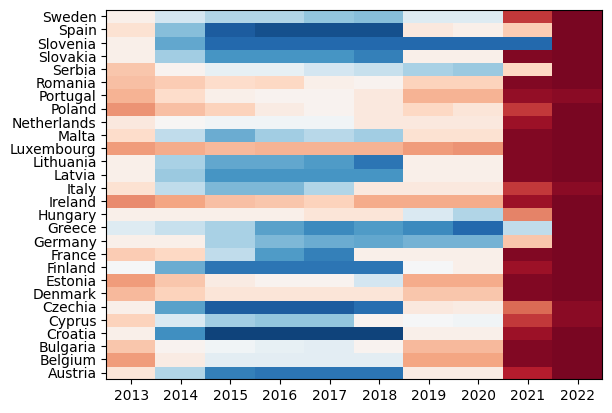

<Figure size 500x500 with 0 Axes>

In [116]:
# Missing data per country and year. The darker red, the more data missing
dfw = pd.pivot(missing_per_year, index='Country', columns='Year', values='pct_missing')
plt.pcolor(dfw, cmap='RdBu_r', vmin=0, vmax=100)
plt.yticks(np.arange(0.5, len(dfw.index), 1), dfw.index)
plt.xticks(np.arange(0.5, len(dfw.columns), 1), dfw.columns)
plt.figure(figsize = (5,5))
plt.show()

In [117]:
df

,country_code,Country,Year,Population,female_population,Deaths,Female deaths,Intentional female homicides,intentional_family,intentional_partner,Int_homicide_by_family_and_partner,femicides,homicide_total,vic_intimate_violence,reported_offences_int_violence,men_perpetrators_int_violence,physical_violence,psychological_violence,sexual_violence,economic_violence,rape_victims,protection_orders,men_prosecuted_for_int_violence,men_sentenced,men_held_in_prison,female_rape_victims,female_sex_assault_victims,rape_convicted,rape_prosecuted,rape_suspected,sex_assault_convicted,sex_assault_prosecuted,sex_assault_suspected,Intentional female homicides_pct_change,intentional_family_pct_change,intentional_partner_pct_change,Int_homicide_by_family_and_partner_pct_change,femicides_pct_change,homicide_total_pct_change,vic_intimate_violence_pct_change,reported_offences_int_violence_pct_change,men_perpetrators_int_violence_pct_change,physical_violence_pct_change,psychological_violence_pct_change,sexual_violence_pct_change,economic_violence_pct_change,rape_victims_pct_change,protection_orders_pct_change,men_prosecuted_for_int_violence_pct_change,men_sentenced_pct_change,men_held_in_prison_pct_change,rape_convicted_pct_change,rape_prosecuted_pct_change,rape_suspected_pct_change,sex_assault_convicted_pct_change,sex_assault_prosecuted_pct_change,sex_assault_suspected_pct_change,female_rape_victims_pct_change,female_sex_assault_victims_pct_change,male_population,Intentional female homicides_per_100000,intentional_family_per_100000,intentional_partner_per_100000,Int_homicide_by_family_and_partner_per_100000,femicides_per_100000,homicide_total_per_100000,vic_intimate_violence_per_100000,reported_offences_int_violence_per_100000,physical_violence_per_100000,psychological_violence_per_100000,sexual_violence_per_100000,economic_violence_per_100000,rape_victims_per_100000,female_rape_victims_per_100000,female_sex_assault_victims_per_100000,men_perpetrators_int_violence_per_100000,protection_orders_per_100000,men_prosecuted_for_int_violence_per_100000,men_sentenced_per_100000,men_held_in_prison_per_100000,rape_convicted_per_100000,rape_prosecuted_per_100000,rape_suspected_per_100000,sex_assault_convicted_per_100000,sex_assault_prosecuted_per_100000,sex_assault_suspected_per_100000,pct_of_jailed_from_prosecuted,pct_of_sentenced_from_prosecuted,comparable_femicides_countries,comparable_countries_reported_offences
2,AT,Austria,2013,8451860.0,4328238.0,79020.000,41378.0,30.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1146.0,660.0,190.0,1619.0,1098.0,109.0,2505.0,1505.0,-21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.8,-4.7,0.9,-48.8,-5.4,-22.7,2.6,-15.4,4123622.0,0.7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.5,15.2,NaN,NaN,NaN,NaN,NaN,4.6,39.3,26.6,2.6,60.7,36.5,NaN,NaN,False,False
3,AT,Austria,2014,8507786.0,4352447.0,77940.000,40662.0,23.0,0.0,0.0,0.0,25.0,38.0,10061.00,9904.0,NaN,5785.0,4049.0,221.0,6.0,485.0,NaN,NaN,NaN,NaN,1061.0,696.0,185.0,1586.0,1084.0,120.0,2421.0,1544.0,-23.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.6,-2.0,-1.3,10.1,-3.4,2.6,-7.4,5.5,4155339.0,0.5,0.0,0.0,0.0,0.6,0.9,231.2,227.6,132.9,93.0,5.1,0.1,11.1,24.4,16.0,NaN,NaN,NaN,NaN,NaN,4.5,38.2,26.1,2.9,58.3,37.2,NaN,NaN,False,False
4,AT,Austria,2015,8584926.0,4384529.0,83026.000,43159.0,17.0,14.0,0.0,14.0,32.0,46.0,10529.00,10297.0,NaN,6172.0,4150.0,196.0,11.0,452.0,NaN,3648.0,433.0,NaN,1045.0,688.0,175.0,1566.0,1003.0,123.0,2450.0,1481.0,-26.1,inf,NaN,inf,28.0,21.1,4.7,4.0,NaN,6.7,2.5,-11.3,83.3,-6.8,NaN,NaN,NaN,NaN,-5.4,-1.3,-7.5,2.5,1.2,-4.1,-1.5,-1.1,4200397.0,0.4,0.3,0.0,0.3,0.7,1.0,240.1,234.8,140.8,94.7,4.5,0.3,10.3,23.8,15.7,NaN,NaN,86.8,10.3,NaN,4.2,37.3,23.9,2.9,58.3,35.3,NaN,11.9,False,False
5,AT,Austria,2016,8700471.0,4427918.0,80374.000,41579.0,31.0,23.0,0.0,23.0,41.0,52.0,11549.00,11297.0,NaN,6550.0,4746.0,247.0,6.0,504.0,NaN,3852.0,524.0,NaN,1123.0,2051.0,186.0,1554.0,1125.0,132.0,